<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<br>
<font size=6>
Homework 1.1
</font><br>
<font size=4>
Classic methods
</font>

**First-Name: Lachin**

**Last-Name: Naghashyar**

**Student-Id: 98110179**

## Imoports and installs

In [18]:
!pip install pydicom

In [19]:
import numpy as np
from pydicom import dcmread
import matplotlib.pyplot as plt
import cv2

In [20]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [21]:
cd /content/drive/MyDrive/Intelligent Analysis of Biomedical Images/HW1

/content/drive/MyDrive/Intelligent Analysis of Biomedical Images/HW1


## load and work with DICOM (5)

complete the function `load_I` it should recive the file name and load the provided DICOM file, print its content and return the image in it.

In [23]:
def load_I(name):

  ds = dcmread(name)
  print(ds)
  image = ds.pixel_array

  return image

I=load_I("img.dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.1055.1.20111103112244831.30826609.78057758
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.1055.1
(0002, 0013) Implementation Version Name         SH: 'dicomlibrary-100'
(0002, 0016) Source Application Entity Title     AE: 'DICOMLIBRARY'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 182
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'OTHER', 'ARC', 'DICOM', 'VALIDATION']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1055

The cell below, adds some noise to the original image, don't change this code and run the cell.

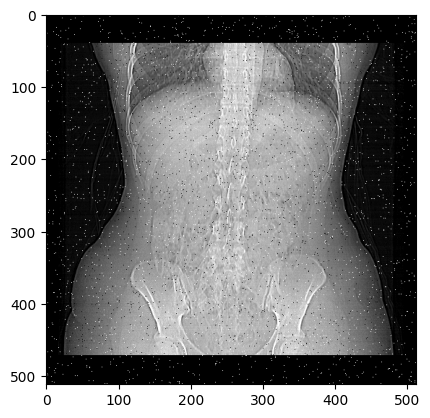

In [24]:
def add_salt_and_pepper_noise(image, noise_ratio=0.02):
    noisy_image = image.copy()
    h, w= noisy_image.shape
    noisy_pixels = int(h * w * noise_ratio)

    for _ in range(noisy_pixels):
        row, col = np.random.randint(0, h), np.random.randint(0, w)
        if np.random.rand() < 0.5:
            noisy_image[row, col] = 0
        else:
            noisy_image[row, col] = 255

    return noisy_image

I=add_salt_and_pepper_noise(I)
plt.imshow(I, cmap="gray")
plt.show()

## Deniosing (25)

In last section we added some noise to the original image, now you are expected to denoise the noisy image using two diffrent approaches.
1. for the first method you should implement a frequency filter for denoising (low pass filter)
2. for the second method with respect to the nature of the noise we added, you are expected to choose a spatial filter that can reduce the noise. the result depends on the filter you choose and it is expexted that the spatial filter removes as much noise as possible.

you can visualize the denoised results at the end of this section to determine if your methods were succesfull.

then you should compare the results and choose the better denoised image.

### 1) denoising using frequency filters (15)
In this section you are expected to complete the function `low_pass`. function recieves niosy image `I`, converts it to frequncy domain using fourier transform, applys a low pass filter and converts it back to space domain and then returns the result (denoised image) `I_df`.

For denoising, first I used the Fourier transform to convert the image to frequency domain and then apply a low pass filter. Next, I used the inverse fourier transform to convert the image back to space domain.

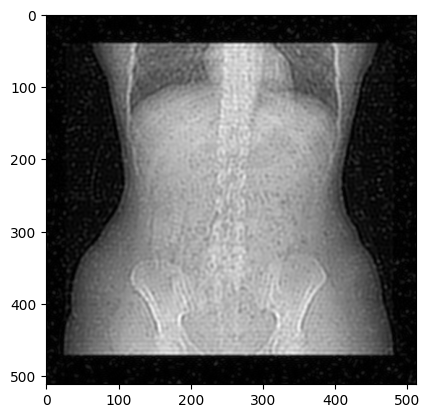

In [34]:
def low_pass(I):
  f = np.fft.fft2(I)
  fshift = np.fft.fftshift(f) #shift the zero frequency component to the center
  rows, cols = I.shape
  crow, ccol = int(rows/2), int(cols/2)

  # create and apply the binary mask with a circle in the center.
  # it allows only the low-frequency components inside the circle to pass
  mask = np.zeros((rows, cols), np.uint8)
  r = 80
  center = [crow, ccol]
  x, y = np.ogrid[:rows, :cols]
  mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
  mask[mask_area] = 1
  fshift = fshift * mask

  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.abs(img_back)
  return img_back


I_df=low_pass(I)
plt.imshow(I_df, cmap="gray")
plt.show()

### 2) denoising using spatial filters (5)

In this section you are expected to complete the function `denoise_spatial`. function recieves niosy image `I`, applies a spatial filter on it to denoise it and returns the denoised image `I_ds`.

One of the most effective methods to remove the salt and pepper noise is median filter. It replaces each pixels value wtih the median vlaue of its neighboring pixels.

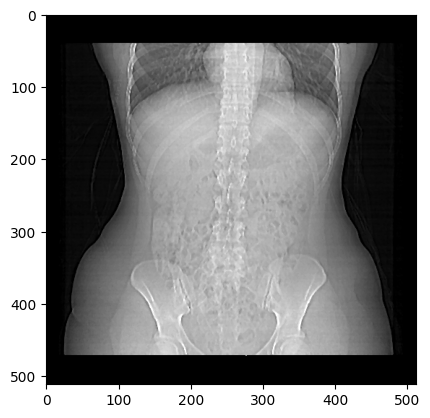

In [35]:
def denoise_spatial(I):
  I_ds = cv2.medianBlur(I, ksize=3)
  return I_ds

I_ds=denoise_spatial(I)
plt.imshow(I_ds, cmap="gray")
plt.show()

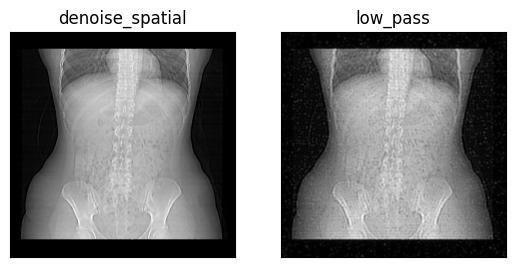

In [36]:
plt.subplot(121),plt.imshow(I_ds, cmap = 'gray')
plt.title('denoise_spatial'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_df, cmap = 'gray')
plt.title('low_pass'), plt.xticks([]), plt.yticks([])
plt.show()

### Question (5)

wich denoising method performed better? how is it related to the type and nature of the noise?

assign your chosen result of denoising to `I` for next section.

I belive for this particular noise that introduces sharp and sudden splkes, median filter is better. Since it replaces each pixels value wtih the median vlaue of its neighboring pixels, it is expected that the spatial filter removes as much noise as possible and is not influenced by the outliers. Also, it doesnt blur the image and hence better preserves edges and fine details. Moreover, it is simple to use.

On the other hand, frequency filter blurs the image much more and this might be due to the fact that salt and pepepr noise affects both low and high frequency components. This way, it has more blurring effect and does not compeletly remove the noise.

In [48]:
I=I_ds
# I=I_df

## Global Sharpening (15)

Denoising images usualy result in less detailed blury images, therfore it is desirable to sharpen the denoised image.
for this means we have to amplify image details by first extracting them and then adding them to the image.

in this section you are expected to sharpen the image as described, once by using high pass filter and once by a spatial filter that can extract details (like edge detection filters).

### 1) sharpening using high pass filter (10)
complete the function `high_pass`.it recives image `I` converts it to frequncy domain using fourier transform, applies a high pass filter and converts it back to space domain and then returns the result (details of the image) `detail_I`.

hint: you can use the low pass filter you implemented earlier.

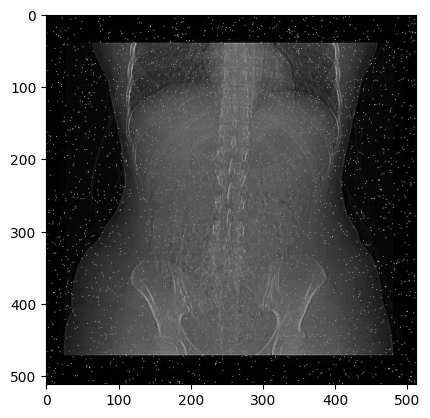

In [40]:
def high_pass(I):
    f = np.fft.fft2(I)
    fshift = np.fft.fftshift(f)

    rows, cols = I.shape
    crow, ccol = rows // 2, cols // 2

    mask_low_pass = np.zeros((rows, cols), np.uint8)
    r = 60
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
    mask_low_pass[mask_area] = 1

    # create the high-pass filter by subtracting the low-pass filter
    mask_high_pass = 1 - mask_low_pass

    fshift_high = fshift * mask_high_pass

    f_ishift_high = np.fft.ifftshift(fshift_high)
    detail_I = np.fft.ifft2(f_ishift_high)
    detail_I = np.abs(detail_I)

    return detail_I


detail_I = high_pass(I)
I_sharp_hi=I+detail_I

plt.imshow(I_sharp_hi, cmap="gray")
plt.show()

### 2) sharpening using a spatial filter (5)
complete the function `detail_spatial`.it recives image `I` applies a spatial filter on it that can extract image details and returns the result (details of the image) `detail_I`.

hint: search for edge detection spatial filters.

In [41]:
def detail_spatial(I):
    laplacian = cv2.Laplacian(I, cv2.CV_64F)

    detail_I = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)

    return detail_I


detail_I = detail_spatial(I)
I_sharp_spatial=I+detail_I

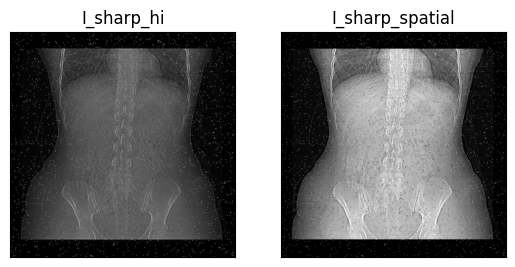

In [42]:
plt.subplot(121),plt.imshow(I_sharp_hi, cmap = 'gray')
plt.title('I_sharp_hi'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_sharp_spatial, cmap = 'gray')
plt.title('I_sharp_spatial'), plt.xticks([]), plt.yticks([])
plt.show()

## Multi-scale image enhancement (40)

In this section you are expected to implement multi-scale image enhancement. You should build pyramid of detail with your preferd enhancment method (you can use the high pass filter you implemented) and add it to the original image level by level.

complete the function `multi_enhance`. it recives the image `I` performs the explained enhancment and returns the result.

you can write other functions as needed to be called in the `multi_enhance` function.

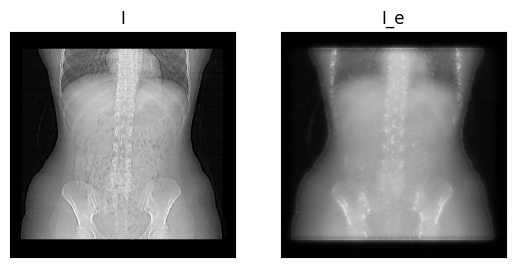

In [78]:
def up_sample_blur(I):
    I_e = cv2.pyrUp(I)

    return(I_e)

def down_sample(I):
    I_d = cv2.pyrDown(I)

    return(I_d)

def image_pyramid(I, n_levels):
    lst = list()
    I = np.float32(I)

    for i in range(0, n_levels):
        I_d = down_sample(I)
        D = I - up_sample_blur(I_d)
        lst.append(D)

        I = I_d

    lst.append(I)

    return(lst)

def image_pyramid_rec(lst, n_levels):

    I = lst[n_levels]

    for i in range(n_levels, 0, -1):
        I = up_sample_blur(I) + lst[i-1]

    return(I)

def enhance_details(details):
    return high_pass(details)

def multi_enhance(I):
    n_levels = 3
    pyramid = image_pyramid(I, n_levels)

    for i in range(n_levels):
        pyramid[i] = enhance_details(pyramid[i])

    I_e = pyramid[n_levels]
    weight = 1.1
    for i in range(n_levels, 0, -1):
        I_e = up_sample_blur(I_e)

        detail_resized = cv2.resize(pyramid[i-1], (I_e.shape[1], I_e.shape[0]))

        detail_resized = detail_resized.astype(I_e.dtype)

        I_e = cv2.addWeighted(I_e, 1, detail_resized, weight, 0)

    return I_e



I_e=multi_enhance(I)

plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_e, cmap = 'gray')
plt.title('I_e'), plt.xticks([]), plt.yticks([])
plt.show()

# I=I_e

In [82]:
I=I_e

## Gray level enhancment (15)

using gray level enhancment try to enhance the contrast of last sections result.
you have to complete the function `gray_enhance` it recives an image `I` and returns the enhanced image `I_c`

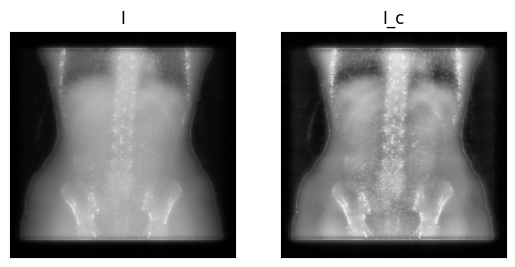

In [86]:
def gray_enhance(I):
    I_8bit = cv2.normalize(I, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    I_c = clahe.apply(I_8bit)
    return I_c

I_c=gray_enhance(I)
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_c, cmap = 'gray')
plt.title('I_c'), plt.xticks([]), plt.yticks([])
plt.show()